In [1]:
%matplotlib inline
SILENT = True
import warnings
if SILENT:
    warnings.filterwarnings("ignore")
import matplotlib
matplotlib.use('Agg')
from neuronunit.plotting.plot_utils import check_bin_vm_soma
from nb_utils import optimize_job
from sciunit.scores import RelativeDifferenceScore
import pandas as pd
import quantities as qt


test


In [2]:
def test_opt_relative_diff(specimen_id,model_type = "ADEXP",efel_filter_iterable=None):    
    _,scores,obs_preds,opt,target = optimize_job(specimen_id,
                                                 model_type,
                                                 score_type=RelativeDifferenceScore,
                                                 efel_filter_iterable=efel_filter_iterable)
    return obs_preds,opt,target


In [3]:
efel_filter_iterable = [
    "ISI_log_slope",
    "mean_frequency",
    "adaptation_index2",
    "first_isi",
    "ISI_CV",
    "median_isi",
    "Spikecount",
    "all_ISI_values",
    "ISI_values",
    "time_to_first_spike",
    "time_to_last_spike",
    "time_to_second_spike",
    ]
obs_preds,opt,target = test_opt_relative_diff(specimen_id = 325479788,model_type="IZHI",efel_filter_iterable=efel_filter_iterable)


gen	nevals	avg    	std    	min    	max  
1  	150   	2802.04	4306.81	18.3801	10000


2  	89    	2646.26	4259.49	18.3801	10000
3  	18    	301.427	1605.45	18.3801	10000
4  	28    	598.902	2240.04	11.1723	10000
5  	29    	571.191	2240.97	11.1723	10000
6  	22    	286.075	1607.87	11.0572	10000
7  	20    	547.237	2243.68	9.85199	10000
8  	15    	145.081	1145.61	9.31547	10000
9  	19    	145.603	1145.56	6.25556	10000
10 	22    	413.044	1956.94	6.25556	10000
11 	21    	142.193	1145.95	6.25556	10000
12 	25    	6.94375	1.93062	6.25556	16.0279
13 	19    	275.292	1609.65	6.25556	10000  
14 	27    	140.203	1146.18	6.25556	10000  
15 	20    	7.47633	3.79259	6.25556	26.8789
16 	30    	10.2918	6.42957	5.70438	33.9671
17 	22    	10.8406	3.72021	4.76082	22.0458
18 	18    	12.0304	4.0257 	4.76082	28.804 
19 	30    	10.3813	4.37429	3.50616	28.194 
20 	25    	10.616 	3.42621	3.50616	16.5724
21 	17    	10.2323	4.35896	3.50616	26.7556
22 	21    	10.2442	5.12874	3.50616	33.9177
23 	21    	142.118	1145.96	3.50616	10000  
24 	18    	6.4987 	3.39632	3.50616	15.1076
25 	24    	9.36753	5.14743	3.50

193	24    	3.73446	3.95855	1.88094	25.9698
194	18    	4.72042	2.91355	1.88094	12.7838
195	24    	6.44594	3.50379	1.88094	15.2325
196	20    	8.22946	5.03373	1.88094	33.5561
197	32    	7.93398	4.60454	1.88094	20.643 
198	24    	10.0235	5.74362	1.88094	28.0228
199	20    	7.20064	4.28765	1.88094	19.9722
200	28    	141.987	1145.98	1.88094	10000  
201	24    	6.97006	4.72556	1.88094	33.6668
202	16    	7.83913	3.68343	1.88094	15.1874
203	21    	7.33662	5.37379	1.88094	33.0034
204	22    	8.6055 	3.10639	1.88094	12.8329
205	13    	141.548	1146.03	1.88094	10000  
206	22    	5.78393	3.30955	1.88094	12.7686
207	22    	142.279	1145.94	1.88094	10000  
208	29    	140.05 	1146.2 	1.88094	10000  
209	16    	5.17735	5.06038	1.88094	32.4674
210	22    	5.61594	3.64597	1.88094	13.0279
211	30    	8.93603	3.26621	1.88094	12.9139
212	27    	9.04582	5.35104	1.88094	33.2604
213	26    	274.664	1609.75	1.88094	10000  
214	18    	139.113	1146.31	1.88094	10000  
215	25    	5.43125	3.84775	1.88094	27.2001
216	29    	

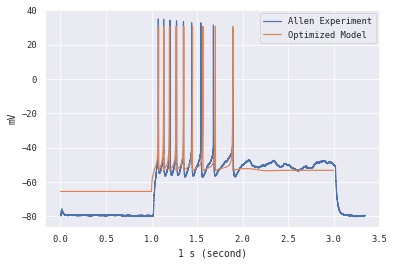

In [4]:

check_bin_vm_soma(target,opt)

In [5]:

params = rounding(opt.attrs)
params


{'C': 139.57257344298193,
 'k': 1.3901339604560186,
 'vr': -65.60806031469524,
 'vt': -40.45577074615002,
 'vPeak': 30.63793471289992,
 'a': 0.010410154970874864,
 'b': 0.7318746331814816,
 'c': -53.49390808261436,
 'd': -11.142835468356076,
 'celltype': 6.502890080962249}

In [6]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'observation',1:'prediction',2:'fitness_value',3:'neuronunit_score'},inplace=True)
df

,0,1,2,3
0,ISI_log_slope,0.485704,0.281472,Relative Difference = 0.20
1,mean_frequency,10.086294,5.057600,Relative Difference = 5.03
2,adaptation_index2,0.091943,0.050939,Relative Difference = 0.04
3,ISI_CV,0.476055,0.185066,Relative Difference = 0.29
4,Spikecount,9.000000,9.000000,Relative Difference = 0.00
5,all_ISI_values,102.212500,212.100000,Relative Difference = 109.89
6,ISI_values,108.400000,231.542857,Relative Difference = 123.14
7,time_to_first_spike,74.600000,82.700000,Relative Difference = 8.10
8,time_to_last_spike,892.300000,1779.500000,Relative Difference = 887.20
9,time_to_second_spike,133.500000,158.700000,Relative Difference = 25.20


In [7]:
efel_filter_iterable = [
    "ISI_log_slope",
    "mean_frequency",
    "adaptation_index2",
    "first_isi",
    "ISI_CV",
    "median_isi",
    "Spikecount",
    "all_ISI_values",
    "ISI_values",
    "time_to_first_spike",
    "time_to_last_spike",
    "time_to_second_spike",
    "peak_voltage",
    "AHP_depth",
    "AHP_depth_abs",
    "base_voltage"
    ]
obs_preds,opt,target = test_opt_relative_diff(specimen_id = 325479788,efel_filter_iterable=efel_filter_iterable)


gen	nevals	avg    	std    	min    	max  
1  	55    	3111.13	4828.65	23.0602	13000


2  	29    	3238.7 	4915.16	22.078 	13000
3  	6     	31.4077	4.5448 	22.078 	36.2831
4  	5     	27.7809	4.20363	22.078 	35.4365
5  	7     	27.9079	5.59242	22.078 	35.4365
6  	8     	30.6939	4.99343	19.2011	36.8533
7  	9     	27.5196	5.8109 	19.2011	36.8728
8  	8     	399.537	1339.27	19.2011	6030.93
9  	10    	471.314	1572.5 	19.2011	6030.93
10 	6     	472.294	1572.22	19.2011	6030.93
11 	7     	654.99 	2326.43	17.554 	11014.8
12 	6     	22.2523	4.18436	17.554 	28.78  
13 	6     	23.9934	3.74108	17.554 	29.8869
14 	8     	25.2535	4.2571 	17.554 	33.0643
15 	10    	24.542 	4.72077	17.554 	33.0643
16 	8     	24.9177	6.07702	17.3903	33.3688
17 	4     	28.4594	5.35324	17.3903	33.3688
18 	6     	23.6442	5.69172	13.6605	32.2565
19 	8     	22.6477	5.25922	13.6605	31.3554
20 	2     	24.3204	6.23401	13.6605	31.3554
21 	10    	21.5527	4.32524	13.6605	28.2353
22 	11    	20.1365	5.33012	13.6605	27.8238
23 	4     	20.2523	4.07753	13.6605	26.1975
24 	10    	18.7315	3.24482	13.6605	26.1672
25 	9     	18

193	7     	11.5508	5.05211	3.70778	31.324 
194	6     	12.5583	4.30181	3.70778	21.5188
195	6     	9.61813	4.11835	3.70778	18.3946
196	5     	10.4696	2.8798 	3.70778	13.7607
197	5     	8.83736	3.11393	3.70778	16.0678
198	4     	9.87525	2.77851	3.70778	15.9884
199	6     	7.9459 	2.93728	3.70778	14.8853
200	10    	9.07528	4.27061	3.70777	14.8943
Run stopped because of stopping criteria: Max ngen


In [27]:

df = pd.DataFrame(obs_preds)
df.rename(columns={0:'observation',1:'prediction',2:'fitness_value',3:'neuronunit_score'},inplace=True)

In [28]:
df

,observation,prediction,fitness_value,neuronunit_score
0,ISI_log_slope,0.485704,0.553328,Relative Difference = 0.07
1,mean_frequency,10.086294,9.898812,Relative Difference = 0.19
2,adaptation_index2,0.091943,0.102598,Relative Difference = 0.01
3,ISI_CV,0.476055,0.489416,Relative Difference = 0.01
4,Spikecount,9.000000,9.000000,Relative Difference = 0.00
5,all_ISI_values,102.212500,104.062500,Relative Difference = 1.85
6,ISI_values,108.400000,110.742857,Relative Difference = 2.34
7,time_to_first_spike,74.600000,76.700000,Relative Difference = 2.10
8,time_to_last_spike,892.300000,909.200000,Relative Difference = 16.90
9,time_to_second_spike,133.500000,134.000000,Relative Difference = 0.50


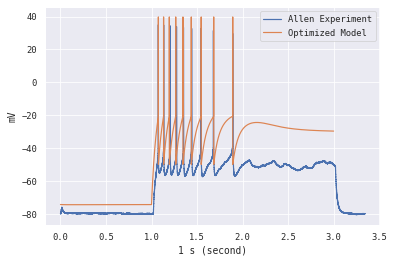

In [9]:
check_bin_vm_soma(target,opt)

In [12]:

params = rounding(opt.attrs)
params

{'cm': 458.0,
 'v_spike': -27.1,
 'v_reset': -49.9,
 'v_rest': -74.2,
 'tau_m': 55.9,
 'a': 5.4,
 'b': 4.5,
 'delta_T': 6.5,
 'tau_w': 169.0,
 'v_thresh': -20.5,
 'spike_delta': 39.8}